In [ ]:
#my objectives.
#1. I want to eliminate duplicate records to ensure each data point is unique 
#2.To avoid misleading calculations or model predictions by replacing error with NaN
#3. convert columns with incosistent datatypes into appropriate formats
#4.to handle missing values


In [2]:
#i first import all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# then i can load the data set
df = pd.read_csv('climate_action_data.csv')

In [6]:
#i check out the structure of the dataset

print("dataset shape:", df.shape) #this displays the number of rows and columns in the dataset
#we display the datatypes of the different columns in the dataset
print("\nColumn data types:\n",df.dtypes)
#i the check out for the empty(missing) values
print("\nMissing values:\n", df.isnull().sum())
#here i display sample data
print("\nSample data:\n",df.head()) 

dataset shape: (913, 10)

Column data types:
 Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

Missing values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Sample data:
   Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3  

In [7]:
#here we replace where we have error with NaN
df.replace('error',np.nan,inplace=True)

In [8]:
#handling the issue of wrong formats
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

In [10]:
#ensuring a correct format for all the date
df['your_date_column'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


In [11]:
#here i am going to be removing duplicate values
df.drop_duplicates(inplace= True)

In [12]:
#i can confirm to make sure  there are no more duplicate values
duplicate_count = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_count}")

number of duplicate rows: 0


In [13]:
#here i impute with the median for numeric(this is to handle missing data)
row_thresh = len(df.columns) // 2
df.dropna(thresh=row_thresh, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
#here i check to confirm of any remaining missing values
print("\nRemaining missing values after cleaning:\n", df.isnull().sum())


Remaining missing values after cleaning:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [21]:
#for the missing values in the date column , we shall fill in a default date

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # ensure it's datetime
df['Date'].fillna(pd.Timestamp('2028-01-01'), inplace=True)  # or the  default date given





C:\Users\Bridget\AppData\Local\Temp\ipykernel_12188\3727408923.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(pd.Timestamp('2028-01-01'), inplace=True)  # or the  default date given


In [16]:
#for the column crop_type we shall handle the issue of missing values by putting a place holder instead
df['Crop_Type'].fillna('Unknown', inplace=True)


C:\Users\Bridget\AppData\Local\Temp\ipykernel_12188\3725816870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crop_Type'].fillna('Unknown', inplace=True)


In [23]:
#now we can check again to re-confirm that we dont have any more missing values
print("\nRemaining missing values after cleaning:\n", df.isnull().sum())


Remaining missing values after cleaning:
 Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
your_date_column                 4
date_column                      0
dtype: int64


In [24]:
#summary of the descriptive statistics  
print("\nDescriptive statistics:\n", df.describe())


Descriptive statistics:
                                 Date  Soil_Moisture(%)     Soil_pH  \
count                            802        802.000000  802.000000   
mean   2026-02-07 19:01:56.708229632         44.767756    6.248865   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-20 06:00:00         26.947500    5.330000   
50%              2026-02-05 12:00:00         45.410000    6.260000   
75%              2026-08-26 18:00:00         62.555000    7.080000   
max              2028-01-01 00:00:00         79.980000    8.000000   
std                              NaN         20.460731    1.021573   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      802.000000   802.000000                     802.000000   
mean        26.461471    60.034539                      87.456983   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.025000                      57.925000  

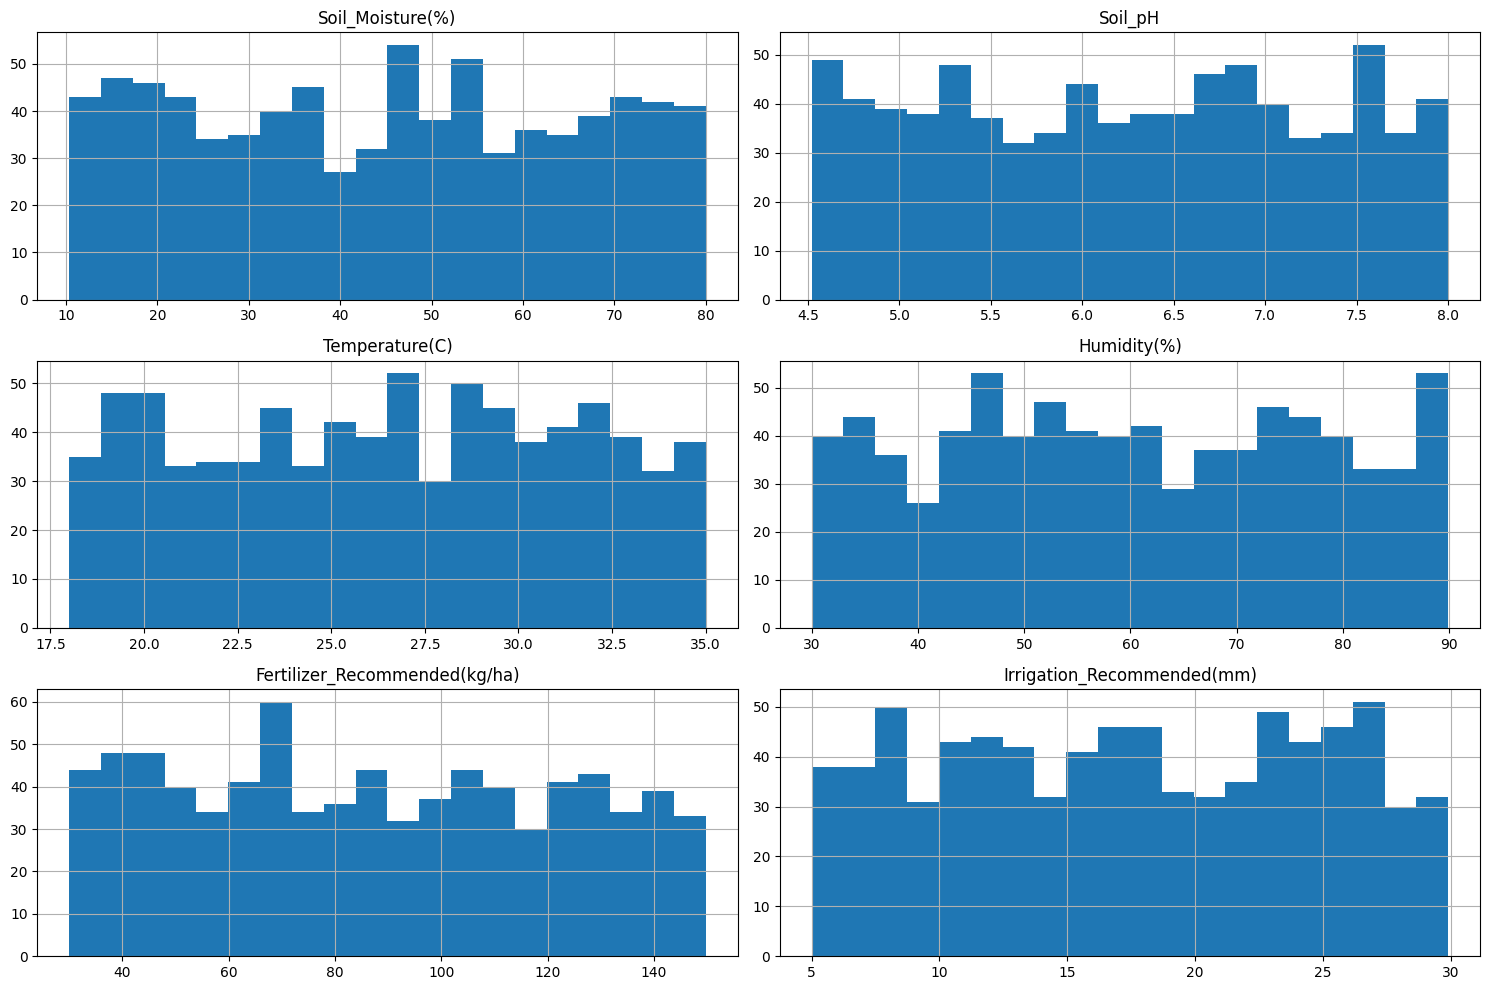

In [25]:
#the histograms for the visualisation of the distribution of numeric variables 
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

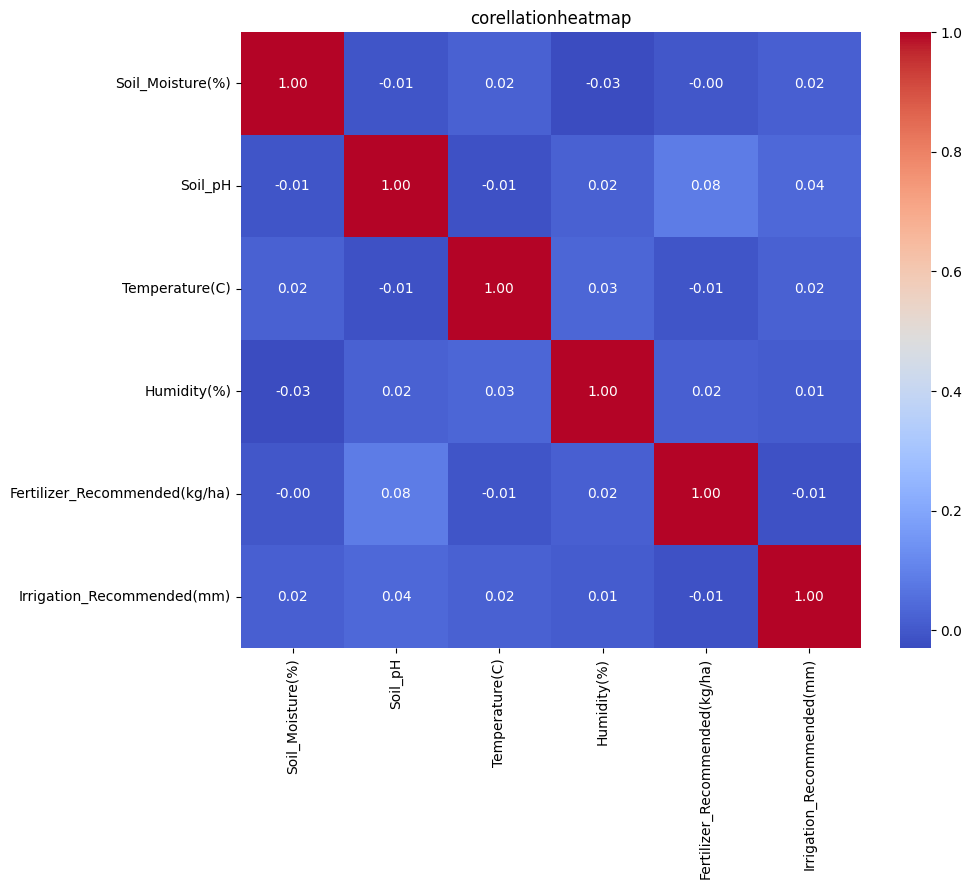

In [26]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("corellationheatmap")
plt.show()

In [28]:
#determing variables that influence fertilizer recommendations
import pandas as pd

if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    if 'Fertilizer_Recommended(kg/ha)' in numeric_df.columns:
        corr_fert = numeric_df.corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
        print("\nVariables most influencing fertilizer recommendations:\n", corr_fert)
    else:
        print("'Fertilizer_Recommended(kg/ha)' is not numeric.")
else:
    print("'Fertilizer_Recommended(kg/ha)' column is missing.")



Variables most influencing fertilizer recommendations:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083672
Humidity(%)                      0.015307
Soil_Moisture(%)                -0.002767
Temperature(C)                  -0.007215
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [ ]:
#what the output i get means
'''
Positive correlation (e.g. Soil_pH, Humidity(%)):
As this variable increases, fertilizer recommendation tends to increase slightly.

Negative correlation (e.g. Soil_Moisture(%), Temperature(C)):
As this variable increases, fertilizer recommendation tends to decrease slightly.
'''

In [30]:
#FINDIND THE CROP TYPE WITH HIGHEST AVERAGE SOIL MOISTURE
if 'Soil_Moisture(%)' in df.columns and 'Crop_Type' in df.columns:
    moisture_avg =df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
    top_crop = moisture_avg.idxmax()
    print(f"\nCrop type with highest average soil moisture:{top_crop} ({moisture_avg[top_crop]:.2f}%)")


Crop type with highest average soil moisture:Unknown (54.77%)


In [32]:
#suggesting irrigation adjustments for crops with avg temperature > 30
if 'Temperature(C)' in df.columns and 'Crop_Type' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Temperature(C)'].mean()
    print("\nCrops with average temperature > 30\u00b0C and suggested irrigation adjustment:")
    for crop, temp in high_temp_crops.items():
        print(f"- {crop}: Avg Temp = {temp:.2f}\u00b0C = Increase irrigation frequency or apply mulching")


Crops with average temperature > 30°C and suggested irrigation adjustment:
- Beans: Avg Temp = 32.31°C = Increase irrigation frequency or apply mulching
- Lettuce: Avg Temp = 32.58°C = Increase irrigation frequency or apply mulching
- Maize: Avg Temp = 32.43°C = Increase irrigation frequency or apply mulching
- Tomatoes: Avg Temp = 32.40°C = Increase irrigation frequency or apply mulching
- Unknown: Avg Temp = 32.60°C = Increase irrigation frequency or apply mulching
- Wheat: Avg Temp = 32.53°C = Increase irrigation frequency or apply mulching


In [33]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("\nCleaned dataset exported as 'cleaned_precision_agriculture-data.csv'")


Cleaned dataset exported as 'cleaned_precision_agriculture-data.csv'
